In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


def construct_graph_and_find_shortest_path(A):
    G = nx.Graph() 

    for i in range(len(A)):
        G.add_node(i)

    for i in range(len(A)):
        for j in range(i+2, len(A)):
            std_dev = np.std(A[i+1:j+1])
            print(f"Weight of {i},{j} edge: {std_dev}")
            G.add_edge(i, j, weight=std_dev)

    path_length, path = nx.single_source_dijkstra(G, source=0, target=len(A)-1)

    return G, path_length, path

A = [0,0.5,0.8,1.1,1.5,1.8,2]

G, path_length, path = construct_graph_and_find_shortest_path(A)
print(f"Shortest path: {path} with length {path_length}")



Weight of 0,2 edge: 0.15000000000000002
Weight of 0,3 edge: 0.24494897427831785
Weight of 0,4 edge: 0.36996621467371854
Weight of 0,5 edge: 0.4673328578219169
Weight of 0,6 edge: 0.5335936864527373
Weight of 1,3 edge: 0.15000000000000002
Weight of 1,4 edge: 0.2867441755680875
Weight of 1,5 edge: 0.3807886552931954
Weight of 1,6 edge: 0.440908153700972
Weight of 2,4 edge: 0.19999999999999996
Weight of 2,5 edge: 0.2867441755680875
Weight of 2,6 edge: 0.33911649915626335
Weight of 3,5 edge: 0.15000000000000002
Weight of 3,6 edge: 0.20548046676563256
Weight of 4,6 edge: 0.09999999999999998
Shortest path: [0, 2, 4, 6] with length 0.44999999999999996


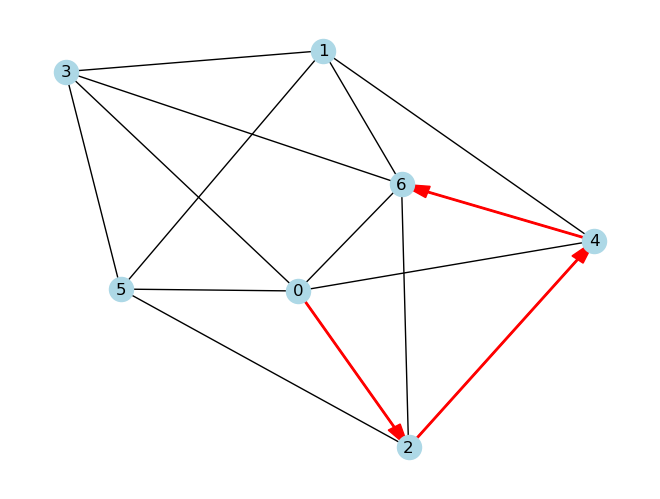

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

# Suponiendo que ya tienes el gráfico G y el camino más corto path calculado

# Dibuja el gráfico completo
pos = nx.spring_layout(G)  # Genera posiciones de nodos
nx.draw(G, pos, with_labels=True, node_color='lightblue')

# Dibuja el camino más corto con aristas rojas
edges_in_path = [(path[i], path[i+1]) for i in range(len(path)-1)]
nx.draw_networkx_edges(G, pos, edgelist=edges_in_path, edge_color='r', width=2)

# Opcional: Dibuja las flechas para indicar la dirección del camino
for i in range(len(path)-1):
    start_pos = pos[path[i]]
    end_pos = pos[path[i+1]]
    plt.arrow(start_pos[0], start_pos[1], end_pos[0] - start_pos[0], end_pos[1] - start_pos[1],
              head_width=0.05, head_length=0.1, fc='r', ec='r', length_includes_head=True)

plt.show()


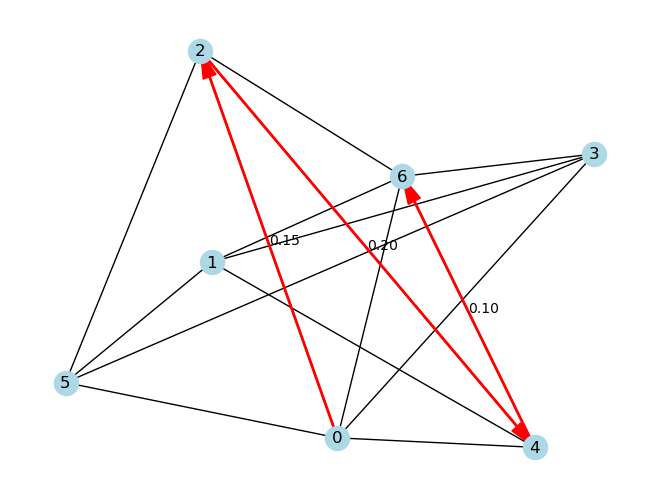

In [15]:
import matplotlib.pyplot as plt
import networkx as nx

# Suponiendo que ya tienes el gráfico G y el camino más corto path calculado

# Dibuja el gráfico completo
pos = nx.spring_layout(G)  # Genera posiciones de nodos
nx.draw(G, pos, with_labels=True, node_color='lightblue')

# Dibuja el camino más corto con aristas rojas
edges_in_path = [(path[i], path[i+1]) for i in range(len(path)-1)]
nx.draw_networkx_edges(G, pos, edgelist=edges_in_path, edge_color='r', width=2)

# Dibuja las flechas y muestra la distancia de cada arista en el camino más corto
for i in range(len(path)-1):
    start_pos = pos[path[i]]
    end_pos = pos[path[i+1]]
    plt.arrow(start_pos[0], start_pos[1], end_pos[0] - start_pos[0], end_pos[1] - start_pos[1],
              head_width=0.05, head_length=0.1, fc='r', ec='r', length_includes_head=True)

    # Calcular la distancia (peso) de la arista
    weight = G[path[i]][path[i+1]]['weight']
    mid_point = ((start_pos[0] + end_pos[0]) / 2, (start_pos[1] + end_pos[1]) / 2)
    plt.text(mid_point[0], mid_point[1], f'{weight:.2f}', color='black')

plt.show()
